# Machine learning
## Linear regression

Useful resources:

* Machine learning in python:
    * check [scikit-learn here](scikit-learn.org/stable/index.html 'available online on the link in the bullet below')
    * scikit-learn.org/stable/index.html


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

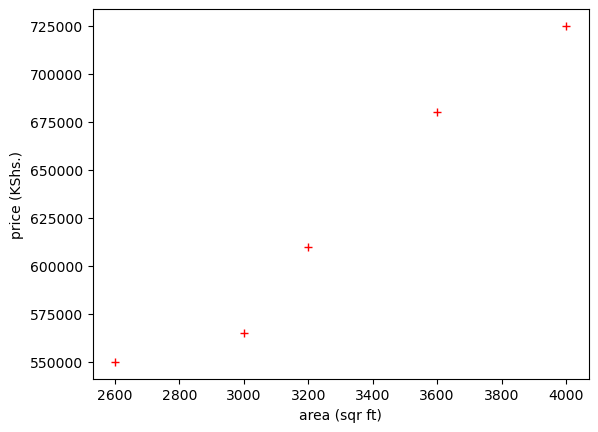

In [132]:
area = [2600, 3000, 3200, 3600, 4000]
price = [550000, 565000, 610000, 680000, 725000]

plt.xlabel('area (sqr ft)')
plt.ylabel('price (KShs.)')
plt.plot(area, price, '+r')
plt.show()

In [133]:

df = pd.read_csv('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/data/homeprices.csv')
df.head()


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [134]:
df[['area']]

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [135]:
regr = linear_model.LinearRegression()
regr.fit(df[['area']], df.price)
regr.coef_

array([135.78767123])

In [136]:
regr.intercept_

180616.43835616432

In [137]:
3300*regr.coef_ + regr.intercept_

array([628715.75342466])

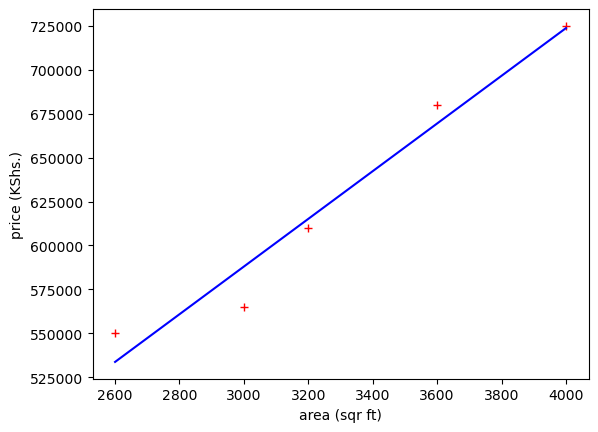

In [138]:
plt.xlabel('area (sqr ft)')
plt.ylabel('price (KShs.)')
plt.plot(df.area, df.price, '+r')
plt.plot(df.area, regr.predict(df[['area']]), color = 'blue')
plt.show()

## predict for a set of area values

In [139]:
#ypred=regr.predict(5000)

d = pd.read_csv('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/data/area_pred.csv')
regr.predict(d[['area']])

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959,  859554.79452055,  628715.75342466])

## Multivariable linear model

In [140]:
dfMulti = pd.read_csv('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/data/homeprices_multivariable.csv')
dfMulti

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


Replace missing number of bedrooms with the median number of bedrooms.

In [141]:
import math
median_bedrooms = math.floor(dfMulti.bedrooms.median())

dfMulti.bedrooms = dfMulti.bedrooms.fillna(median_bedrooms)
dfMulti

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [142]:
reg = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
reg.fit(dfMulti[['area', 'bedrooms', 'age']], df.price)

LinearRegression(n_jobs=1)

In [143]:
reg.coef_

array([  143.625, -6762.5  ,   337.5  ])

In [144]:
reg.intercept_

173112.50000000012

In [145]:

dfMultiInds = pd.read_csv('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/data/multi_pred.csv')
dfMultiInds

reg.predict(dfMultiInds[['area', 'bedrooms', 'age']])

array([597200. , 506812.5])

## Save trained model

In [146]:
import pickle

In [147]:
with open('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/machine learning/model_pickle', 'wb') as f:
    pickle.dump(reg, f)
    

## use trained model for prediction

### pickle approach

In [148]:
with open('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/machine learning/model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [149]:
mp.coef_

array([  143.625, -6762.5  ,   337.5  ])

In [150]:
mp.predict(dfMultiInds[['area', 'bedrooms', 'age']])

array([597200. , 506812.5])

### Joblib approach

Error in importing joblib from sklearn.externals. Check the video below on how to correct the error.

In [151]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HW0dc1eG6tU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [152]:
#from sklearn.externals import joblib
import joblib 

In [153]:
joblib.dump(reg, 'C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/machine learning/model_joblib')

['C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/machine learning/model_joblib']

In [154]:
mj = joblib.load('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/machine learning/model_joblib')

In [155]:
mj.predict(dfMultiInds[['area', 'bedrooms', 'age']])

array([597200. , 506812.5])

## Dummy variables in Python

In [156]:
dfTownships = pd.read_csv('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/data/township_houses.csv')
dfTownships.head(3)



,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000


In [157]:
dummies = pd.get_dummies(dfTownships.town)
merged = pd.concat([dfTownships, dummies], axis= 'columns')
dffinal = merged.drop(['town', 'west windsor'], axis = 'columns')
dffinal

,area,price,monroe township,robbinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [158]:
regTowns = linear_model.LinearRegression()

X = dffinal.drop(['price'], axis='columns')
Y = dffinal.price

regTowns.fit(X, Y)

LinearRegression()

In [159]:
regTowns.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [160]:
regTowns.intercept_

249790.36766292533

In [161]:

dfTowntoPred = pd.read_csv('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/data/towns_to_predict.csv')

regTowns.predict(dfTowntoPred[['area', 'monroe township', 'robbinsville']])

array([590775.63964739, 681241.66845839])

In [162]:
regTowns.score(X, Y) # how accurate the model is, 1 is perfect

0.9573929037221873

## Convert categorical variables using label encorder: OneHotEncoder


In [173]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/9yl6-HEY7_s" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [164]:
dfle = dfTownships
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [165]:
X = dfle[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [166]:
Y = dfle.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [167]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
[('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],
remainder = 'passthrough')
X = ct.fit_transform(X)
X



array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [168]:
X = X[:, 1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [169]:
reg2Towns = linear_model.LinearRegression()

reg2Towns.fit(X, Y)

LinearRegression()

In [170]:
reg2Towns.coef_

array([25686.4115244 , 40013.97548914,   126.89744141])

In [171]:
reg2Towns.predict([[1, 0, 2800]])

array([590775.63964739])

In [172]:
reg2Towns.predict([[0, 1, 3400]])

array([681241.6684584])